In [1]:
import pandas as pd
import pdfplumber
import datetime as dt
import matplotlib.pyplot as plt
import openpyxl
pd.set_option('display.max_rows', None)
pd.set_option("mode.copy_on_write", True)

from datetime import datetime

# Load and clean

In [2]:
file = "records/Ramsey/RamseyCountySales2024.xlsx"

In [ ]:
# # If loading multiple xlsx/csv's, you can concat the DFs
# dfs = []

# for f in files:
#     df = pd.read_excel(f)
#     dfs.append(df)

# df = pd.concat(dfs, ignore_index = True)

In [3]:
df = pd.read_excel(file)

In [4]:
RCdf1 = df[['Sale Date', 'Land Use', 'Tax Payer Names']]

In [5]:
RCdf2 = RCdf1[RCdf1['Land Use'] == "R - SINGLE FAMILY DWELLING, PLATTED LOT"]

In [6]:
RCdf2.reset_index(inplace = True, drop = True)

In [7]:
RCTotals = RCdf2.groupby(RCdf2['Sale Date'].dt.month)['Tax Payer Names'].count()

In [8]:
df_totalSales = pd.DataFrame({"Month": RCTotals.index, "Number of Sales": RCTotals.values})

In [9]:
privEqui = "LLC|INC|INCORPORATED|FUNDS|INVESTMENT"

In [10]:
RCdf2.dropna(inplace = True)

In [11]:
df_keep = RCdf2[RCdf2['Tax Payer Names'].str.contains(privEqui)]

In [12]:
df_keep.reset_index(inplace = True, drop = True)

In [13]:
df2019 = df_keep.groupby(df_keep['Sale Date'].dt.month)['Tax Payer Names'].count()

In [14]:
df_totalSales['Corp Sales Count'] = df2019.values

In [15]:
df_totalSales['Percentage of Total Sales'] = [round((df_totalSales['Corp Sales Count'][i]/df_totalSales['Number of Sales'][i] *100), 2) for i in range(len(df_totalSales))]

In [16]:
df_totalSales

,Month,Number of Sales,Corp Sales Count,Percentage of Total Sales
0,1,406,27,6.65
1,2,419,37,8.83
2,3,463,32,6.91
3,4,561,31,5.53
4,5,676,64,9.47
5,6,638,36,5.64
6,7,651,38,5.84
7,8,619,37,5.98
8,9,601,102,16.97
9,10,605,39,6.45


In [ ]:
df_totalSales.to_csv("records/Ramsey/RamseySalesData2024.csv", index = False)

# VIZ

In [17]:
df1 = pd.read_csv("records/Ramsey/RamseySalesData2019.csv")
df2 = pd.read_csv("records/Ramsey/RamseySalesData2020.csv")
df3 = pd.read_csv("records/Ramsey/RamseySalesData2021.csv")
df4 = pd.read_csv("records/Ramsey/RamseySalesData2022.csv")
df5 = pd.read_csv("records/Ramsey/RamseySalesData2023.csv")
df6 = pd.read_csv("records/Ramsey/RamseySalesData2024.csv")

In [18]:
df1['Month'] = df1['Month'].apply(lambda x: "2019 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df2['Month'] = df2['Month'].apply(lambda x: "2020 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df3['Month'] = df3['Month'].apply(lambda x: "2021 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df4['Month'] = df4['Month'].apply(lambda x: "2022 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df5['Month'] = df5['Month'].apply(lambda x: "2023 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df6['Month'] = df6['Month'].apply(lambda x: "2024 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))

In [19]:
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index = True)

In [20]:
fontdict = {"fontfamily": "Gill Sans", "fontsize": 16}

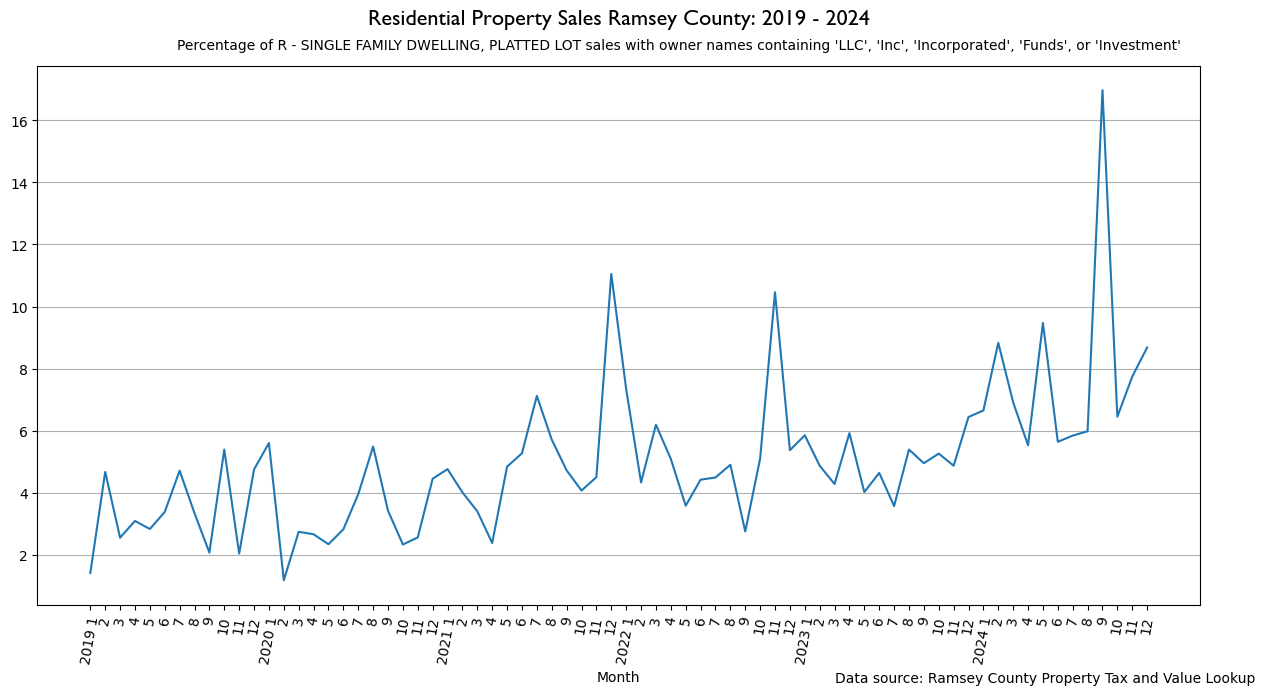

In [21]:

df.plot(kind = 'line', x = 'Month', y = 'Percentage of Total Sales', rot = 80, figsize=(15, 7), legend = False)
plt.xticks(range(len(df['Month'])), df['Month'])
plt.title("Residential Property Sales Ramsey County: 2019 - 2024", pad = 30, **fontdict)
plt.text(x = 5.8, y = 18.3, s = "Percentage of R - SINGLE FAMILY DWELLING, PLATTED LOT sales with owner names containing 'LLC', 'Inc', 'Incorporated', 'Funds', or 'Investment'")
plt.text(x = 50.0, y = -2.1, s = "Data source: Ramsey County Property Tax and Value Lookup")
plt.grid(axis = 'y')
plt.show()